In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

busselton au
maceio br
pevek ru
castro cl
iqaluit ca
ushuaia ar
manta ec
multan pk
palabuhanratu id
bluff nz
vestmanna fo
georgiyevka kz
new norfolk au
san benito abad co
aklavik ca
rikitea pf
lovington us
bluff nz
taolanaro mg
punta arenas cl
rikitea pf
torbay ca
bac can vn
guerrero negro mx
provideniya ru
ushuaia ar
bredasdorp za
pagouria gr
vite in
castro cl
areia branca br
punta arenas cl
agirish ru
cape town za
saint-philippe re
hilo us
hithadhoo mv
new norfolk au
hithadhoo mv
bambous virieux mu
touros br
cape town za
iqaluit ca
bluff nz
belushya guba ru
mariental na
honiara sb
severomuysk ru
tytuvenai lt
isla mujeres mx
mar del plata ar
lompoc us
faya td
saint-francois gp
lebu cl
boralday kz
marsh harbour bs
avarua ck
fairbanks us
taolanaro mg
avarua ck
busselton au
rikitea pf
albany au
ushuaia ar
bathsheba bb
zhengjiatun cn
esperance au
puerto ayora ec
la ferte-bernard fr
stepnyak kz
thompson ca
jamestown sh
vaini to
albany au
skibbereen ie
ikwiriri tz
half moon bay us
norman we

shubarshi kz
barrow us
vaitupu wf
ilhabela br
airai pw
charters towers au
bluff nz
kodiak us
attawapiskat ca
hithadhoo mv
butaritari ki
nowy sacz pl
jamestown sh
nikolskoye ru
new norfolk au
tuktoyaktuk ca
victoria sc
vaini to
nome us
yellowknife ca
fairbanks us
port macquarie au
bluff nz
rikitea pf
avarua ck
cape town za
lorengau pg
albany au
bredasdorp za
chokurdakh ru
carnarvon au
barrow us
mataura pf
bredasdorp za
umm lajj sa
salalah om
kodiak us
kahului us
ilulissat gl
taolanaro mg
ust-kuyga ru
salalah om
sheltozero ru
butaritari ki
formoso do araguaia br
bengkulu id
bathsheba bb
ushuaia ar
the valley ai
port alfred za
kottagudem in
chokurdakh ru
chickasha us
seoul kr
adrar dz
college us
bethel us
butaritari ki
khatanga ru
riaba gq
vaini to
tasiilaq gl
vaitupu wf
mahebourg mu
patea nz
port alfred za
cape town za
rocha uy
cape town za
vaitupu wf
atuona pf
cape town za
jamestown sh
taolanaro mg
georgetown sh
touros br
arraial do cabo br
puerto ayora ec
grand river south east mu
coqu

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

648

In [7]:
import requests
requests.__version__

'2.24.0'

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
#    if (i % 50 == 0 and i >= 50):
#        set_count += 1
#        record_count = 1
    # Create endpoint URL with each city.
#    city_url = url + "&q=" + "i"

In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

print(len(city_data))

Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | maceio
Processing Record 3 of Set 1 | pevek
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | manta
Processing Record 8 of Set 1 | multan
Processing Record 9 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | vestmanna
Processing Record 12 of Set 1 | georgiyevka
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | san benito abad
Processing Record 15 of Set 1 | aklavik
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | lovington
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | torbay
Processing Record 21 of Set 1 | bac can
City not found. Skipping...
Processing Record 22 of Set 1 | guerrero negro
Processing Re

City not found. Skipping...
Processing Record 36 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 37 of Set 4 | hobart
Processing Record 38 of Set 4 | nanortalik
Processing Record 39 of Set 4 | dunedin
Processing Record 40 of Set 4 | tuatapere
Processing Record 41 of Set 4 | sitka
Processing Record 42 of Set 4 | warrington
Processing Record 43 of Set 4 | inderborskiy
City not found. Skipping...
Processing Record 44 of Set 4 | pareora
Processing Record 45 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 4 | cilegon
Processing Record 47 of Set 4 | ribeira grande
Processing Record 48 of Set 4 | san rafael
Processing Record 49 of Set 4 | korgen
Processing Record 50 of Set 4 | ust-koksa
Processing Record 1 of Set 5 | henties bay
Processing Record 2 of Set 5 | svetlyy
Processing Record 3 of Set 5 | port hedland
Processing Record 4 of Set 5 | havelock
Processing Record 5 of Set 5 | lorengau
Processing Record 6 of Set 5 | bargal
City not found.

Processing Record 24 of Set 8 | hovd
Processing Record 25 of Set 8 | geraldton
Processing Record 26 of Set 8 | asau
Processing Record 27 of Set 8 | westport
Processing Record 28 of Set 8 | krasnoselkup
Processing Record 29 of Set 8 | mazyr
Processing Record 30 of Set 8 | luanda
Processing Record 31 of Set 8 | nyurba
Processing Record 32 of Set 8 | skowhegan
Processing Record 33 of Set 8 | yelizovo
Processing Record 34 of Set 8 | murska sobota
Processing Record 35 of Set 8 | marcona
City not found. Skipping...
Processing Record 36 of Set 8 | celestun
Processing Record 37 of Set 8 | springfield
Processing Record 38 of Set 8 | charters towers
Processing Record 39 of Set 8 | liberal
Processing Record 40 of Set 8 | ilulissat
Processing Record 41 of Set 8 | kindu
Processing Record 42 of Set 8 | gamboma
Processing Record 43 of Set 8 | muli
Processing Record 44 of Set 8 | umm kaddadah
Processing Record 45 of Set 8 | nome
Processing Record 46 of Set 8 | kalabo
Processing Record 47 of Set 8 | ng

Processing Record 13 of Set 12 | balikpapan
Processing Record 14 of Set 12 | ola
Processing Record 15 of Set 12 | scottsburgh
City not found. Skipping...
Processing Record 16 of Set 12 | goma
Processing Record 17 of Set 12 | kulhudhuffushi
Processing Record 18 of Set 12 | sesheke
Processing Record 19 of Set 12 | puri
Processing Record 20 of Set 12 | lodja
Processing Record 21 of Set 12 | lyaskelya
Processing Record 22 of Set 12 | takoradi
Processing Record 23 of Set 12 | hobyo
Processing Record 24 of Set 12 | taszar
Processing Record 25 of Set 12 | vila velha
Processing Record 26 of Set 12 | mount isa
Processing Record 27 of Set 12 | dalinghe
City not found. Skipping...
Processing Record 28 of Set 12 | bonthe
Processing Record 29 of Set 12 | zaragoza
Processing Record 30 of Set 12 | naze
Processing Record 31 of Set 12 | port lincoln
Processing Record 32 of Set 12 | yaan
Processing Record 33 of Set 12 | seymchan
Processing Record 34 of Set 12 | alyangula
Processing Record 35 of Set 12 |

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,43.00,98,20,4.29,AU,2020-08-02 21:43:11
1,Maceio,-9.67,-35.74,73.40,88,40,8.05,BR,2020-08-02 21:49:18
2,Pevek,69.70,170.31,37.11,93,100,3.13,RU,2020-08-02 21:44:09
3,Castro,-24.79,-50.01,54.64,71,0,3.76,BR,2020-08-02 21:42:17
4,Iqaluit,63.75,-68.51,51.80,81,75,3.36,CA,2020-08-02 21:43:09
5,Ushuaia,-54.80,-68.30,41.00,86,24,10.29,AR,2020-08-02 21:43:11
6,Manta,-0.95,-80.73,82.40,65,75,8.05,EC,2020-08-02 21:49:18
7,Multan,30.20,71.48,93.20,63,0,98.87,PK,2020-08-02 21:49:19
8,Bluff,-46.60,168.33,47.21,92,68,6.38,NZ,2020-08-02 21:43:16
9,Vestmanna,62.16,-7.17,50.00,100,100,12.75,FO,2020-08-02 21:49:19


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2020-08-02 21:43:11,-33.65,115.33,43.00,98,20,4.29
1,Maceio,BR,2020-08-02 21:49:18,-9.67,-35.74,73.40,88,40,8.05
2,Pevek,RU,2020-08-02 21:44:09,69.70,170.31,37.11,93,100,3.13
3,Castro,BR,2020-08-02 21:42:17,-24.79,-50.01,54.64,71,0,3.76
4,Iqaluit,CA,2020-08-02 21:43:09,63.75,-68.51,51.80,81,75,3.36
5,Ushuaia,AR,2020-08-02 21:43:11,-54.80,-68.30,41.00,86,24,10.29
6,Manta,EC,2020-08-02 21:49:18,-0.95,-80.73,82.40,65,75,8.05
7,Multan,PK,2020-08-02 21:49:19,30.20,71.48,93.20,63,0,98.87
8,Bluff,NZ,2020-08-02 21:43:16,-46.60,168.33,47.21,92,68,6.38
9,Vestmanna,FO,2020-08-02 21:49:19,62.16,-7.17,50.00,100,100,12.75


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/02/20'

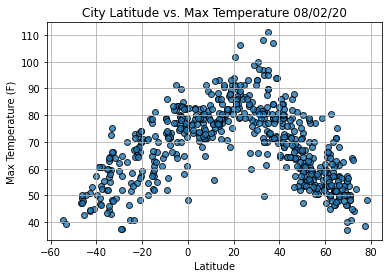

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

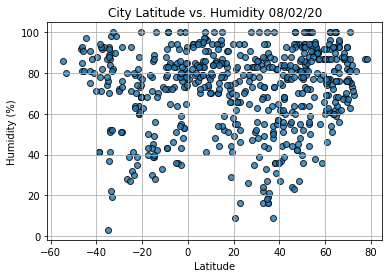

In [20]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

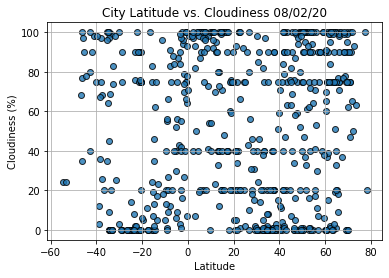

In [21]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

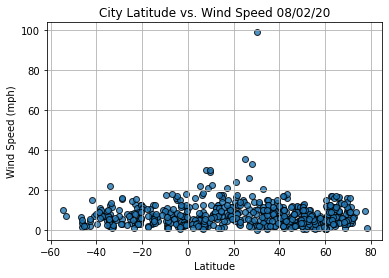

In [22]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [23]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [24]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

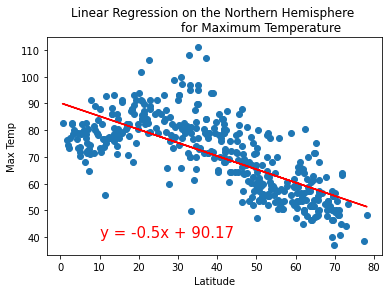

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n \
                       for Maximum Temperature', 'Max Temp',(10,40))

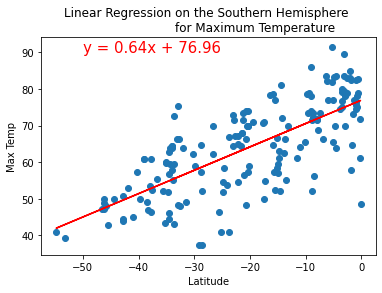

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n \
                       for Maximum Temperature', 'Max Temp',(-50,90))

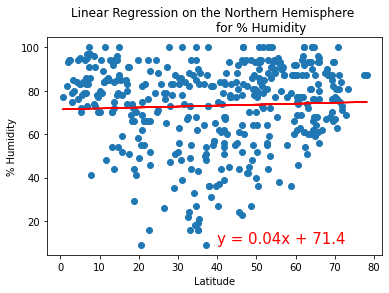

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n \
                       for % Humidity', '% Humidity',(40,10))

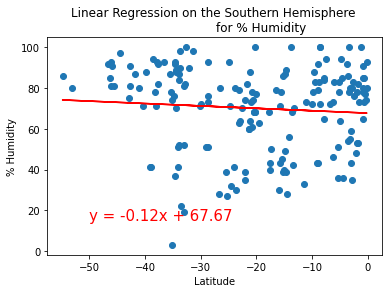

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n \
                       for % Humidity', '% Humidity',(-50,15))

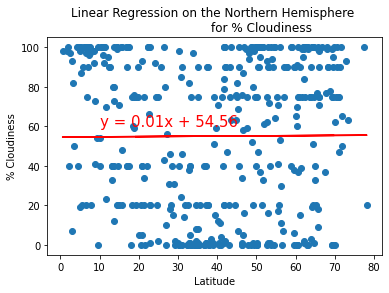

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n \
                       for % Cloudiness', '% Cloudiness',(10,60))

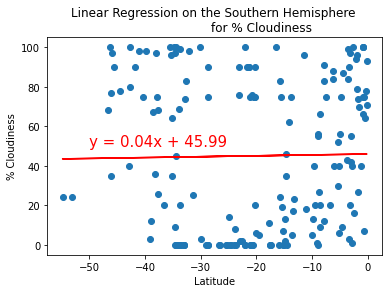

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n \
                       for % Cloudiness', '% Cloudiness',(-50,50))

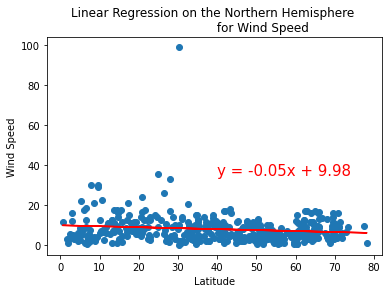

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n \
                        for Wind Speed', 'Wind Speed',(40,35))

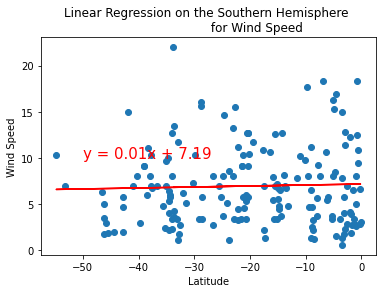

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n \
                        for Wind Speed', 'Wind Speed',(-50,10))